# Aufgabe 2
## Ahmed Adnan, Nicolas Huhle, Eugen Erb

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

#### read the pics

In [24]:
bild01 = imread("bild01.jpg")
bild02 = imread("bild02.jpg")

#### display them

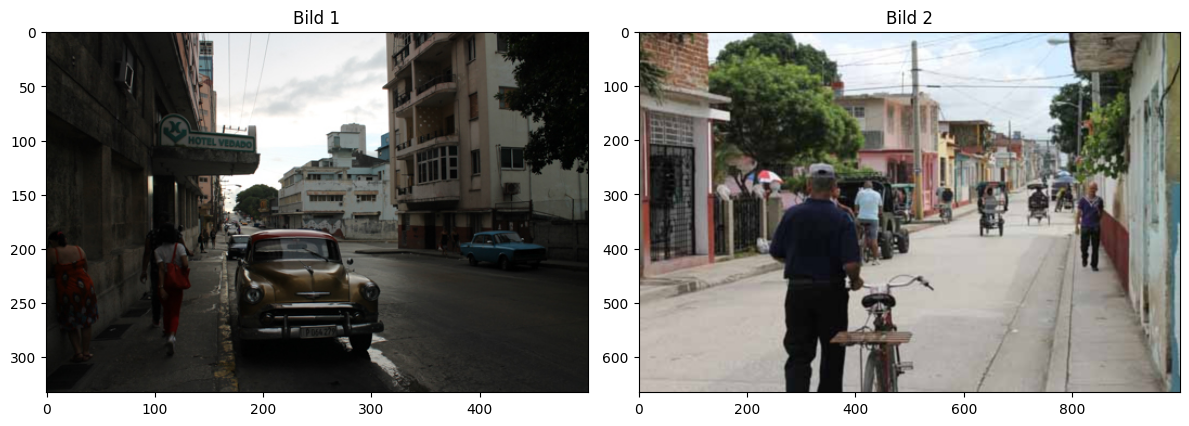

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(bild01)
plt.title("Bild 1")

plt.subplot(1, 2, 2)
plt.imshow(bild02)
plt.title("Bild 2")

plt.tight_layout()
plt.show()


### Cumulative Histograms:
A histogram counts how many pixels have each intensity (0–255).

A cumulative histogram (or CDF) sums those counts up to each intensity value:

cdf[i] = hist[0] + hist[1] + ... + hist[i]

In [26]:
def compute_cumHisto(image):
    """
    Computes the normalized cumulative histogram (CDF) of an 8-bit grayscale image.
    
    Parameters:
        image (2D numpy array): grayscale image with pixel values in range 0–255

    Returns:
        cum_histo (1D numpy array of length 256): normalized cumulative histogram
    """
    # initialize histogram (256 bins)
    histo = np.zeros(256, dtype=int)
    
    # fill the histogram
    height, width = image.shape
    for y in range(height):
        for x in range(width):
            pixel = image[y, x]
            histo[pixel] += 1
    
    # cumulative sum
    cum_histo = np.cumsum(histo)
    
    # normalize to [0, 1]
    cum_histo = cum_histo / cum_histo[-1]  # divide by total number of pixels
    
    return cum_histo


#### Load a grayscale image and test the function:

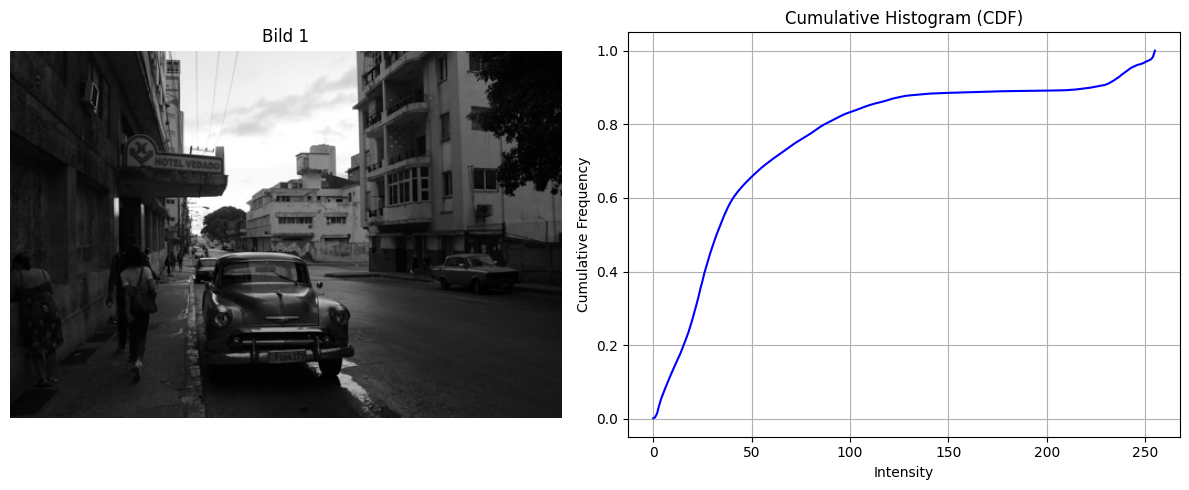

In [27]:
image_gray = imread("bild01.jpg", as_gray=True)

# convert float image to 8-bit integer range [0, 255]
image_gray = (image_gray * 255).astype(np.uint8)

#cumulative histogram
cum_histo = compute_cumHisto(image_gray)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Bild 1")
axes[0].axis('off')

# cumulative Histogram
axes[1].plot(cum_histo, color='blue')
axes[1].set_title("Cumulative Histogram (CDF)")
axes[1].set_xlabel("Intensity")
axes[1].set_ylabel("Cumulative Frequency")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Q/ What is a homogeneous and a non-homogeneous point operation? <br>
#### Homogeneous point operation:
Applies the same transformation to every pixel in the image.<br>
The operation does not depend on the pixel’s location.

#### Non-homogeneous point operation:
The transformation varies across the image, depending on: <BR>
Pixel position, Local context Or other spatially varying factors
Example: brightness changes based on pixel position (e.g., vignette effect)

### Q/ What is the difference between point operations and filter operations? <br>
#### point operations:
-Affect each pixel individually<br>
-Only the pixel’s own value is used<br>
-No neighboring pixels involved<br>

#### filter operations:
-Affect each pixel based on its neighborhood (surrounding pixels)<br>
-Typically use a kernel (e.g., 3x3 matrix)<br>
-Involve convolution or similar processing<br>
Example: Blurring (Gaussian filter)

### Adjust bild01 so that its brightness distribution looks more like bild02
Step-by-step idea: <br>
Compute cumulative histograms (CDFs) for both images

For each intensity value in bild01, find the closest match in the CDF of bild02

Create a LUT that maps bild01's pixel values to matched values

Apply that LUT to bild01 to get a new version that resembles bild02

#### Define the function to create the LUT

In [28]:
def match_Histo(img_histo, ref_histo):
    """
    Creates a LUT that maps pixel intensities from one image to match another,
    based on their cumulative histograms.

    Parameters:
        img_histo (numpy array): normalized CDF of the image to transform
        ref_histo (numpy array): normalized CDF of the reference image

    Returns:
        LUT (numpy array): lookup table of 256 elements
    """
    LUT = np.zeros(256, dtype=np.uint8)

    for i in range(256):
        # find the value in ref_histo that is closest to img_histo[i]
        diff = np.abs(ref_histo - img_histo[i])
        match_index = np.argmin(diff)  # position where difference is smallest
        LUT[i] = match_index

    return LUT


In [29]:
def apply_LUT_to_image(image, LUT):
    """
    Applies the LUT to a grayscale image.
    """
    height, width = image.shape
    result = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            result[y, x] = LUT[image[y, x]]

    return result

In [30]:
# Convert images to grayscale and 8-bit
img1 = (imread("bild01.jpg", as_gray=True) * 255).astype(np.uint8)
img2 = (imread("bild02.jpg", as_gray=True) * 255).astype(np.uint8)

# Compute cumulative histograms
cdf_img1 = compute_cumHisto(img1)
cdf_img2 = compute_cumHisto(img2)

# Create LUT
LUT = match_Histo(cdf_img1, cdf_img2)

# Apply LUT to image01
img1_matched = apply_LUT_to_image(img1, LUT)


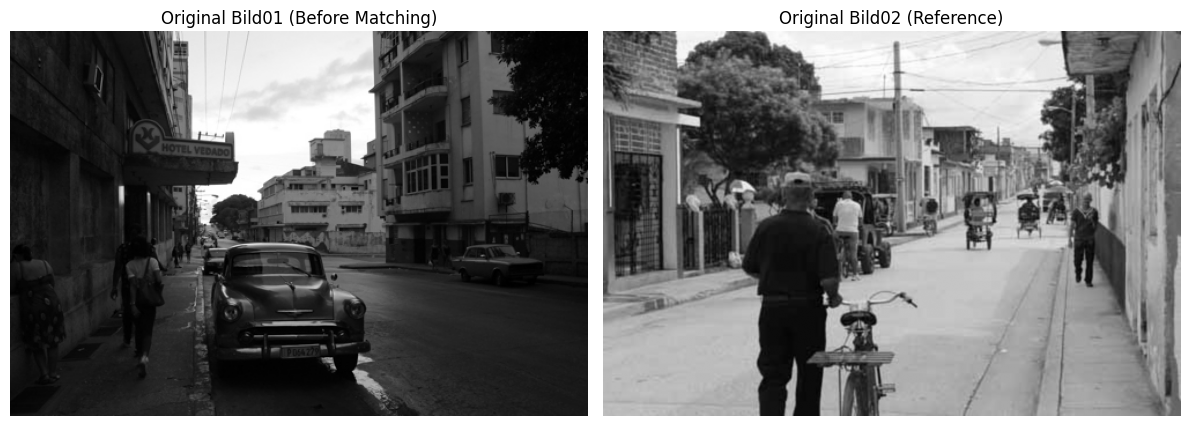

In [34]:
# Step: Show original grayscale images before matching
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title("Original Bild01 (Before Matching)")
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray')
axes[1].set_title("Original Bild02 (Reference)")
axes[1].axis('off')

plt.tight_layout()
plt.show()


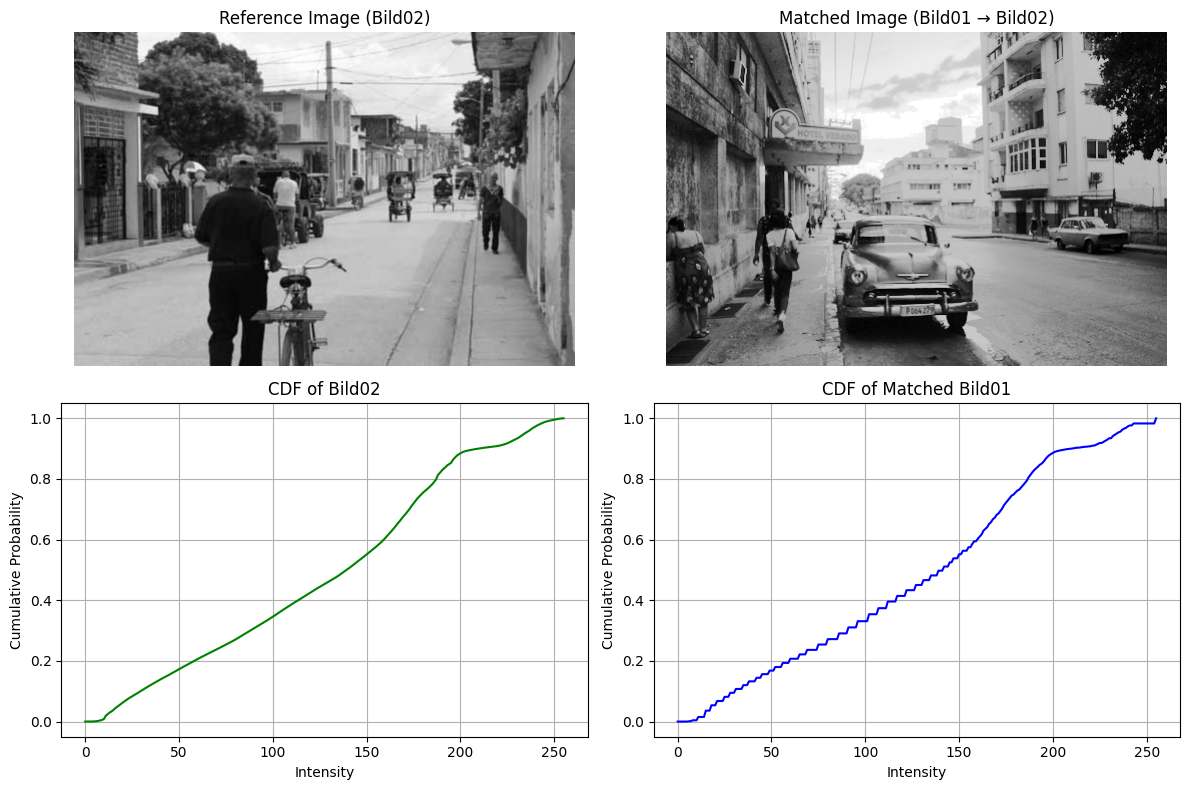

In [35]:
# plot the result
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Images
axes[0, 0].imshow(img2, cmap='gray')
axes[0, 0].set_title("Reference Image (Bild02)")
axes[0, 0].axis('off')

axes[0, 1].imshow(img1_matched, cmap='gray')
axes[0, 1].set_title("Matched Image (Bild01 → Bild02)")
axes[0, 1].axis('off')

# cumulative Histograms
axes[1, 0].plot(cdf_img2, color='green')
axes[1, 0].set_title("CDF of Bild02")
axes[1, 0].set_xlabel("Intensity")
axes[1, 0].set_ylabel("Cumulative Probability")
axes[1, 0].grid(True)

cdf_img1_matched = compute_cumHisto(img1_matched)

axes[1, 1].plot(cdf_img1_matched, color='blue')
axes[1, 1].set_title("CDF of Matched Bild01")
axes[1, 1].set_xlabel("Intensity")
axes[1, 1].set_ylabel("Cumulative Probability")
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

### Why do we need to normalize the histograms?

We are comparing distributions, not raw counts

CDFs represent probabilities, so they must be compatible

Histogram equalization and matching work on percentiles, which only make sense if they’re normalized